In [1]:
from framework import FrameWork
from survival_probablity import MSW,PseudoDirac

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


frame = FrameWork(resolution_correction=True, masked_val=2.5)

spectrum_data = np.loadtxt('./Data/B8_SuperK_Spectrum_2023.txt')

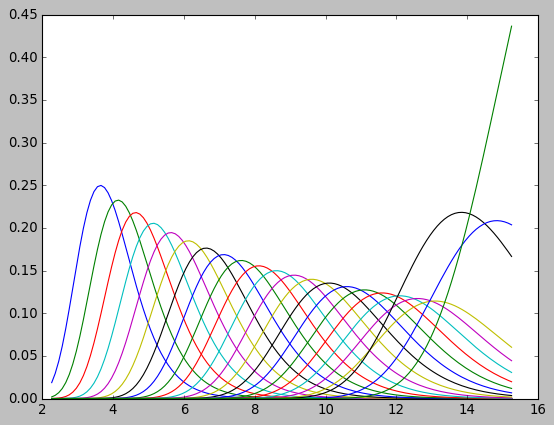

In [2]:
energy_obs  = spectrum_data[:,0:2]
resp_func   = frame._response_function(energy_obs, frame.energy_recoil)

for i in range (len(energy_obs)):
    plt.plot(frame.energy_recoil,resp_func[i])

In [3]:
borom_unoscilated_spectrum = frame._compute_unoscilated_signal(frame.energy_recoil, frame.energy_nu,
                                                               frame.spectrum_nu, energy_obs,
                                                               frame.cs_electron,resp_func)



year = 365.25 * 24. * 6. * 6.
day  = 24. * 6. * 6.


b_un_year = 1e-5 * year * frame.norm * frame.target_number * borom_unoscilated_spectrum
b_un_day = 1e-5 * day * 22.5 * frame.norm * frame.target_number * borom_unoscilated_spectrum

<ErrorbarContainer object of 3 artists>

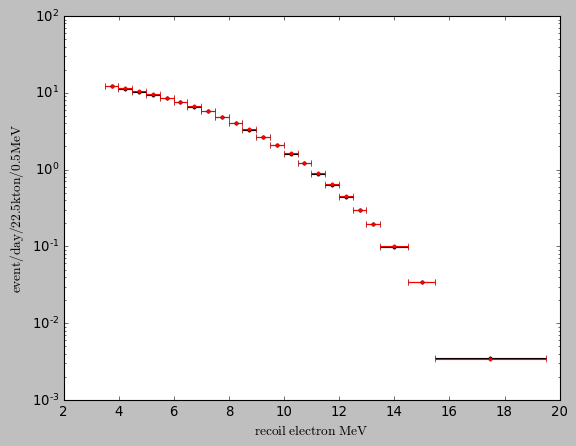

In [4]:
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
             (0.5/(energy_obs[:,1]-energy_obs[:,0]))*spectrum_data[:,11]*22.5/365.25,yerr=None,
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
            (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_day , yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

<ErrorbarContainer object of 3 artists>

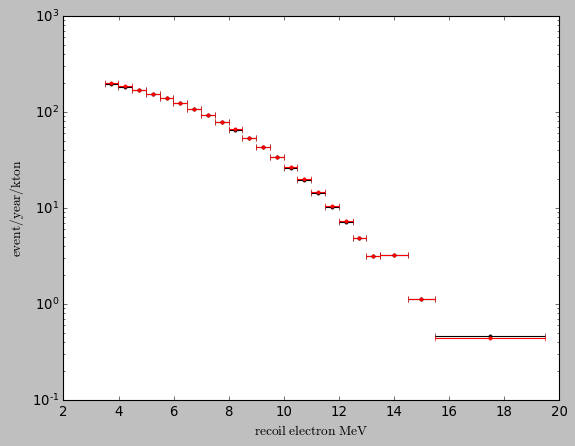

In [5]:
plt.yscale('log')
plt.ylabel(r'$\rm event/year/kton$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),spectrum_data[:,11],yerr=None,
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),b_un_year , yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

In [61]:
frame.param.update({'SinT12': 0.319, 'M12': 7.51e-5})
survival_probablity = MSW(frame.param,frame.energy_nu)

In [62]:
integral_electron = np.zeros(len(frame.energy_recoil))
integral_muon  = np.zeros(len(frame.energy_recoil))

for k in range (len(frame.energy_recoil)):
    integral_electron[k] = np.trapz(frame.spectrum_nu[k:]*frame.cs_electron[k,k:]*survival_probablity[k:]
                                    ,frame.energy_nu[k:])
    integral_muon[k] = np.trapz(frame.spectrum_nu[k:]*frame.cs_muon[k,k:]*(1-survival_probablity[k:]),
                                frame.energy_nu[k:])
    
    

integral_electron_recoil = np.zeros(len(energy_obs))
integral_muon_recoil = np.zeros(len(energy_obs))
for i in range (len(energy_obs)):
    integral_electron_recoil[i] = np.trapz(integral_electron*resp_func[i],frame.energy_recoil)
    integral_muon_recoil[i] = np.trapz(integral_muon*resp_func[i],frame.energy_recoil)

In [63]:
spectrum_event_day = 1e-5 * day * 22.5 * frame.norm * frame.target_number * (integral_electron_recoil +
                                                                             integral_muon_recoil)

<ErrorbarContainer object of 3 artists>

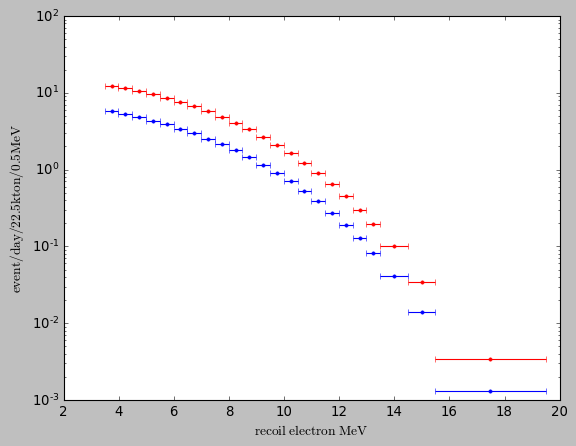

In [64]:
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
            (0.5/(energy_obs[:,1]-energy_obs[:,0])) * spectrum_event_day, yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='b.')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
            (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_day , yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

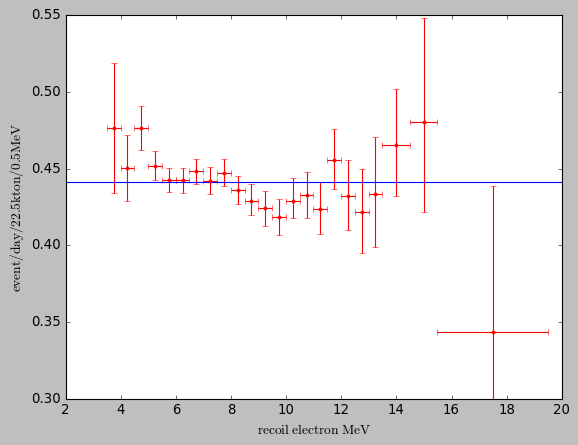

In [65]:
plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
             spectrum_data[:,2]/(spectrum_data[:,11]+spectrum_data[:,12]), 
             yerr= np.array([spectrum_data[:,4],spectrum_data[:,3]])/(spectrum_data[:,11]+spectrum_data[:,12]), 
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

plt.hlines(xmin=2,xmax=20,y=0.441)

<ErrorbarContainer object of 3 artists>

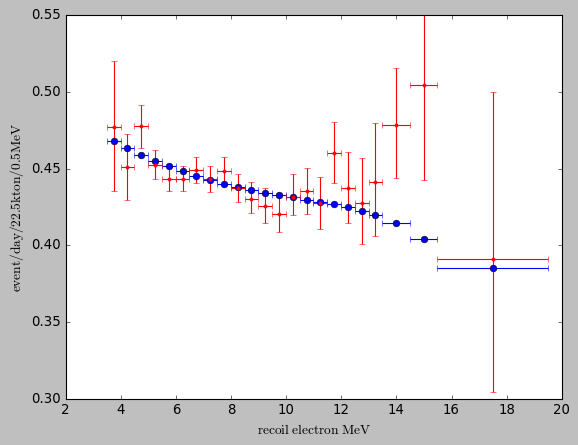

In [66]:
plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
            (integral_electron_recoil+integral_muon_recoil)/borom_unoscilated_spectrum, yerr=None, 
            xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='bo')


plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]),
             spectrum_data[:,2]/(spectrum_data[:,11]), 
             yerr= np.array([spectrum_data[:,4],spectrum_data[:,3]])/(spectrum_data[:,11]), 
             xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

In [67]:
print(np.mean(spectrum_data[:13,2]/(spectrum_data[:13,11])))
print(np.mean(((integral_electron_recoil+integral_muon_recoil)/borom_unoscilated_spectrum)[:13]))

0.44620659387043743
0.44718490752280177


In [53]:
print(spectrum_data[:,12]/spectrum_data[:,11])

[0.00175963 0.00183506 0.00192171 0.00203247 0.00215884 0.00230644
 0.00248372 0.00269687 0.00296061 0.00327744 0.00365492 0.00416667
 0.00476471 0.00553435 0.00648101 0.00775623 0.00937198 0.01159218
 0.01466942 0.01873016 0.02732919 0.04955752 0.13913043]
